# stat and stop codon analysis

In [3]:
import os
import re
import pandas as pd
import seaborn as sns
from Bio import *
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
from Bio import SeqIO
import traceback

In [4]:
phage_order = [
    'Pa15',
 'Pa28',
'Pa36',
 'Pa29',
 'Pa22',
 'Pa6',
 'Pa18',
 'Pa25',
'Pa3',
 'Pa10',
 'Pa12',
 'Pa21',
 'Pa24',
 'Pa2',
 'Pa33',
 'Pa35']

## start codon analysis

In [5]:
all_snps_df = pd.read_csv('final_df.csv').drop('Unnamed: 0', axis = 1)
all_snps_df = all_snps_df[(all_snps_df.loc[:, 'reference'].isin(phage_order)) & (all_snps_df.loc[:, 'reads'].isin(phage_order))]
all_snps_df =  all_snps_df[(all_snps_df.loc[:, 'morphology reads'] == 'Myoviridae') & (all_snps_df.loc[:, 'morphology reference'] == 'Myoviridae')]
all_snps_df.loc[:, 'protein translation'] =  all_snps_df.loc[:, 'protein translation'].str[2:-2]
wrong_start_df = all_snps_df[all_snps_df.loc[:, 'error'].str.contains('is not a start codon')].reset_index(drop = True)
wrong_start_df.loc[:, 'percentage cutoff'] = wrong_start_df.loc[:, 'altered protein'].str.find('M')/wrong_start_df.loc[:, 'protein translation'].str.len()*100
wrong_start_df.loc[:, 'original protein length'] = wrong_start_df.loc[:, 'protein translation'].str.len()
wrong_start_df.loc[:, 'error'] = wrong_start_df.loc[:, 'error'].str.extract("(?<=First codon ')(.*)(?=' is not a start codon)").loc[:, 0]

In [6]:
len(all_snps_df[all_snps_df.loc[:, 'altered sequence'].str[0] != 'A'].groupby('protein annotation').size())/len(all_snps_df.groupby('protein annotation').size())*100


8.293460925039872

What wrong start utations do we have? 

In [ ]:
wrong_start_df = all_snps_df[all_snps_df.loc[:, 'altered sequence'].str[0] != 'A'].groupby('protein annotation').first()
summary_wrong_start = wrong_start_df.groupby('error', as_index = False).size()
num_start_codon_mutations = (summary_wrong_start.loc[:, 'size'].sum() - 8)
#/len(all_snps_df.groupby('protein annotation').size())*100
summary_wrong_start.loc[:, 'percentage'] = summary_wrong_start.loc[:, 'size']/num_start_codon_mutations*100
summary_wrong_start

In [32]:
len(all_snps_df.groupby('protein annotation'))

627

In [28]:
100-(all_snps_df.loc[:, 'altered protein'].str[0] == 'M').sum()/all_snps_df.shape[0]*100/len(all_snps_df.groupby('protein annotation').size())*100

85.12456891631396

In [14]:
wrong_start_df

,POS,REF,ALT,reference,reads,morphology reference,morphology reads,gene start,gene stop,protein annotation,...,complement,protein translation,ID,Size (bp),phage,altered sequence,error,altered protein,percentage cutoff,original protein length
0,24960,G,T,Pa10,Pa12,Myoviridae,Myoviridae,24958,25222,['SEED:fig|287.19287.peg.44'],...,1,MYAPDHPEEVPMSFLEMQVDQPQPKTAPSFVLIGILYLIGDERLDD...,287.19287,66638.0,Pa10,ATTTACGCACCAGACCATCCTGAAGAGGTTCCTATGTCCTTCCTCG...,ATT,IYAPDHPEEVPMSFLEMQVDQPQPKTAPSFVLIGILYLIGDERLDD...,12.643678,87
1,39614,G,A,Pa10,Pa12,Myoviridae,Myoviridae,38789,41678,['SEED:fig|287.19287.peg.61'],...,-1,MITPELIPSPFAAQGDKDPIPQTSSTGFANLRDGYTPDYEISLASN...,287.19287,66638.0,Pa10,GTGATCACACCCGAACTGATACCCAGTCCGTTTGCTGCGCAGGGCG...,GTG,VITPELIPSPFAAQGDKDPIPQTSSTGFANLRDGYTPDYEISLASN...,7.796258,962
2,39632,T,G,Pa10,Pa12,Myoviridae,Myoviridae,38789,41678,['SEED:fig|287.19287.peg.61'],...,-1,MITPELIPSPFAAQGDKDPIPQTSSTGFANLRDGYTPDYEISLASN...,287.19287,66638.0,Pa10,GTGATCACACCCGAACTGATACCCAGTCCGTTTGCTGCGCAGGGCG...,GTG,VITPELIPSPFAAQGDKDPIPQTSSTGFANLRDGYTPDYEISLASN...,7.796258,962
3,39686,C,A,Pa10,Pa12,Myoviridae,Myoviridae,38789,41678,['SEED:fig|287.19287.peg.61'],...,-1,MITPELIPSPFAAQGDKDPIPQTSSTGFANLRDGYTPDYEISLASN...,287.19287,66638.0,Pa10,GTGATCACACCCGAACTGATACCCAGTCCGTTTGCTGCGCAGGGCG...,GTG,VITPELIPSPFAAQGDKDPIPQTSSTGFANLRDGYTPDYEISLASN...,7.796258,962
4,39782,G,A,Pa10,Pa12,Myoviridae,Myoviridae,38789,41678,['SEED:fig|287.19287.peg.61'],...,-1,MITPELIPSPFAAQGDKDPIPQTSSTGFANLRDGYTPDYEISLASN...,287.19287,66638.0,Pa10,GTGATCACACCCGAACTGATACCCAGTCCGTTTGCTGCGCAGGGCG...,GTG,VITPELIPSPFAAQGDKDPIPQTSSTGFANLRDGYTPDYEISLASN...,7.796258,962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,66091,C,T,Pa12,Pa10,Myoviridae,Myoviridae,65752,66223,['SEED:fig|287.19288.peg.93'],...,-1,PDFEVVQKAQPTQQGTSTRPTIFFQKLFDIPRGWPATDWHLDNTAR...,287.19288,66223.0,Pa12,CCGGATTTTGAAGTCGTCCAGAAAGCTCAGCCGACCCAACAGGGAA...,CCG,PDFEVVQKAQPTQQGTSTRPTIFFQKLFDIPRGWPATDWHLDNTAR...,83.333333,156
2788,66133,A,G,Pa12,Pa10,Myoviridae,Myoviridae,65752,66223,['SEED:fig|287.19288.peg.93'],...,-1,PDFEVVQKAQPTQQGTSTRPTIFFQKLFDIPRGWPATDWHLDNTAR...,287.19288,66223.0,Pa12,CCGGATTTTGAAGTCGTCCAGAAAGCTCAGCCGACCCAACAGGGAA...,CCG,PDFEVVQKAQPTQQGTSTRPTIFFQKLFDIPRGWPATDWHLDNTAR...,83.333333,156
2789,66145,T,C,Pa12,Pa10,Myoviridae,Myoviridae,65752,66223,['SEED:fig|287.19288.peg.93'],...,-1,PDFEVVQKAQPTQQGTSTRPTIFFQKLFDIPRGWPATDWHLDNTAR...,287.19288,66223.0,Pa12,CCGGATTTTGAAGTCGTCCAGAAAGCTCAGCCGACCCAACAGGGAA...,CCG,PDFEVVQKAQPTQQGTSTRPTIFFQKLFDIPRGWPATDWHLDNTAR...,83.333333,156
2790,66154,A,G,Pa12,Pa10,Myoviridae,Myoviridae,65752,66223,['SEED:fig|287.19288.peg.93'],...,-1,PDFEVVQKAQPTQQGTSTRPTIFFQKLFDIPRGWPATDWHLDNTAR...,287.19288,66223.0,Pa12,CCGGATTTTGAAGTCGTCCAGAAAGCTCAGCCGACCCAACAGGGAA...,CCG,PDFEVVQKAQPTQQGTSTRPTIFFQKLFDIPRGWPATDWHLDNTAR...,83.333333,156


# - What is the error we get? What does it tell about the transation that occurred? 
- What is the distribution of the cutoff after a wrong start codon? 
- Are phages prepared for this cutoff? 

C:\Users\Halewijn\AppData\Local\Temp/ipykernel_19368/826715217.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  M_positions = np.array(M_positions)
C:\Users\Halewijn\AppData\Local\Temp/ipykernel_19368/826715217.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sns.histplot(np.concatenate(np.array(normalized_M_positions)), bins = 100, ax = axes[0][2], kde=True)


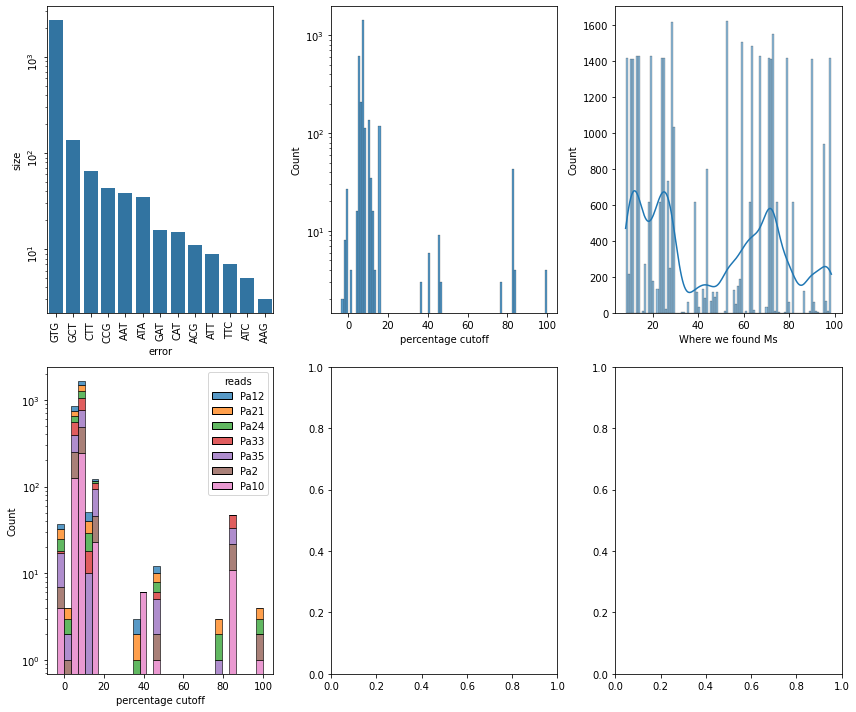

In [57]:
fig, axes = plt.subplots(2,3, figsize = (12,10))

#first plot
sns.barplot(data= wrong_start_df.groupby('error', as_index = False).size().sort_values('size', ascending = False),
            x = 'error', y = 'size', color='tab:blue', ax = axes[0][0])
axes[0][0].set_yscale('log')
axes[0][0].tick_params(labelrotation=90)

#histogram plot of cutoff
sns.histplot(data = wrong_start_df, x = 'percentage cutoff', bins = 100, ax = axes[0][1], kde = False)
axes[0][1].set_yscale('log')

#third plot 
M_positions = []
protein_translation = wrong_start_df.loc[:, 'protein translation'].astype('str').str[2:-2]
for ii in range(len(protein_translation)): 
    found_positions = [i for i, letter in enumerate(protein_translation[ii]) if letter == 'M']
    found_positions = found_positions[1:]
    M_positions = M_positions + [found_positions]
    # if np.array(found_positions).shape[0] == 0: 
    #     print('no methyl groups')
    #M_positions = M_positions[1:]

lengths = np.array(protein_translation.str.len())
M_positions = np.array(M_positions)
normalized_M_positions = []
for ii in range(len(lengths)): 
    length = lengths[ii]
    np.divide(M_positions[ii],length)*100
    normalized_M_positions = normalized_M_positions + [np.divide(M_positions[ii],length)*100]
sns.histplot(np.concatenate(np.array(normalized_M_positions)), bins = 100, ax = axes[0][2], kde=True)
axes[0][2].set_xlabel('Where we found Ms')

#fourth plot 
sns.histplot(data = wrong_start_df, x = 'percentage cutoff', hue = 'reads', multiple = 'stack', bins = 30, palette=sns.color_palette(n_colors=len(wrong_start_df.loc[:, 'reads'].unique())), 
            ax = axes[1][0])
axes[1][0].set_yscale('log')


plt.tight_layout()
plt.show()

In [ ]:
filt_wrong_start = wrong_start_df[wrong_start_df.loc[:, 'percentage cutoff'] >= 10]
filt_wrong_start =  filt_wrong_start.reset_index()
#filt_wrong_start.loc[:, '']
filt_wrong_start.loc[:, 'product'].unique()
filt_wrong_start.columns

In [11]:
histogram_plot = filt_wrong_start[['reference', 'reads', 'product', 'percentage cutoff', 'original protein length']]
histogram_plot
binsize = 100
bins = 100/binsize
bin_array = np.arange(0, 100,bins)
all_filt_set_array = []
for ii in range(len(bin_array)): 
    start = bin_array[ii]
    stop = start + binsize
    filt_set = histogram_plot[(histogram_plot.loc[:, 'percentage cutoff'] >= start)]
    filt_set.loc[:, 'start'] = [start]*filt_set.shape[0]
    all_filt_set_array = all_filt_set_array + [filt_set]
all_filt_set_array = pd.concat(all_filt_set_array)    
gr_all_filt_set_array =  all_filt_set_array.groupby(['start', 'product'], as_index = False).size()

C:\Users\Halewijn\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


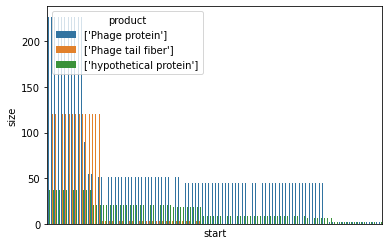

In [12]:
sns.barplot(data = gr_all_filt_set_array, x = 'start', y = 'size', hue = 'product')
plt.xticks([])
plt.show()

What is this tail fiber? Why does it have so many start codons? Check the amount of start codons

In [13]:
wrong_start_df.loc[:, 'product'].unique()

array(["['hypothetical protein']", "['Phage tail fiber']",
       "['Phage protein']",
       "['DNA polymerase III alpha subunit (EC 2.7.7.7)']"], dtype=object)

In [14]:
phage_tail_fiber_df = wrong_start_df[wrong_start_df.loc[:, 'product'] == "['Phage tail fiber']"].reset_index()
phage_tail_fiber_df.columns

Index(['index', 'POS', 'REF', 'ALT', 'reference', 'reads',
       'morphology reference', 'morphology reads', 'gene start', 'gene stop',
       'protein annotation', 'product', 'complement', 'protein translation',
       'ID', 'Size (bp)', 'phage', 'altered sequence', 'error',
       'altered protein', 'percentage cutoff', 'original protein length'],
      dtype='object')

In [15]:
with open (r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\mutational analysis\phage tail fiber' 
          + '/' + 'alignment.fasta', 'w') as f: 
    f.write('')
with open (r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\mutational analysis\phage tail fiber' 
          + '/' + 'alignment.fasta', 'a') as f: 
    for ii in range(phage_tail_fiber_df.shape[0]): 
        tail_fiber_sequence = phage_tail_fiber_df.loc[ii, 'altered protein']
        reads = phage_tail_fiber_df.loc[ii, 'reads']
        reference = phage_tail_fiber_df.loc[ii, 'reference']
        position = phage_tail_fiber_df.loc[ii, 'POS']
        f.write('>ref_' + reference + '_read_' + reads + '_position_' + str(position) + '\n')
        f.write(tail_fiber_sequence + '\n')

In [16]:
s = 'python is fun'
c = 'M'
print([pos for pos, char in enumerate(s) if char == c])

[]


## stop codons

In [17]:
all_snps_df = pd.read_csv('final_df.csv').drop('Unnamed: 0', axis = 1)
wrong_stop_df = all_snps_df[all_snps_df.loc[:, 'error'].str.contains('stop')]

- where are the extra stop codons found? 
- what is the percentage cutoff? 
- Which phage has a cutoff? make a stackplot. Is there phage specificity? 

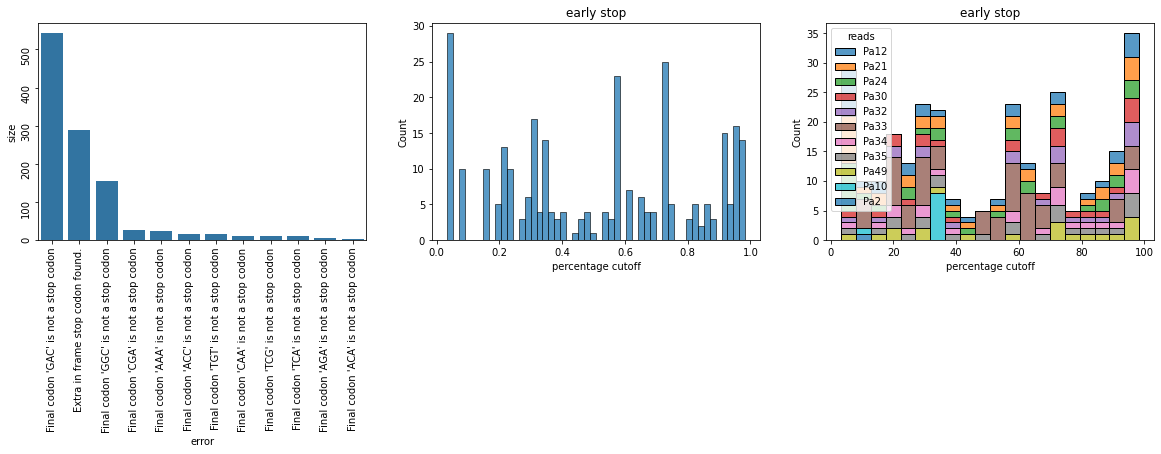

In [18]:
fig, axes = plt.subplots(1,3, figsize = (20,4))
#first figure
sns.barplot(data = wrong_stop_df.groupby('error', as_index = False).size().sort_values('size', ascending = False), x = 'error', y = 'size', color = 'tab:blue', ax = axes[0])
axes[0].tick_params(labelrotation=90)
#second figure
early_stop_df = wrong_stop_df[wrong_stop_df.loc[:, 'error'].str.contains('Extra in frame')].reset_index()
early_stop_df.loc[:, 'percentage cutoff'] = 1- early_stop_df.loc[:, 'altered protein'].str.find('*')/(early_stop_df.loc[:, 'altered protein'].str.len() + 1)
sns.histplot(early_stop_df.loc[:, 'percentage cutoff'], bins = 50, ax = axes[1])
axes[1].set_title('early stop')

#second figure 
early_stop_df = wrong_stop_df[wrong_stop_df.loc[:, 'error'].str.contains('Extra in frame')].reset_index()
early_stop_df.loc[:, 'percentage cutoff'] = (1- early_stop_df.loc[:, 'altered protein'].str.find('*')/(early_stop_df.loc[:, 'altered protein'].str.len() + 1))*100
sns.histplot(data = early_stop_df, x = 'percentage cutoff', hue = 'reads',  ax = axes[2], multiple = 'stack', palette=sns.color_palette(n_colors=len(early_stop_df.loc[:, 'reads'].unique())), bins = 20)
axes[2].set_title('early stop')

#plt.tight_layout()
plt.show()

- What proteins that are cut are represented a lot

In [19]:
product_cutoff_and_count = early_stop_df.groupby('product', as_index = False).size()
product_cutoff_and_count.loc[:, 'mean cutoff'] = early_stop_df.groupby('product', as_index = False)['percentage cutoff'].mean().loc[:, 'percentage cutoff']
product_cutoff_and_count.sort_values('size', ascending = False)

,product,size,mean cutoff
11,['hypothetical protein'],99,37.630439
7,['Phage protein'],59,56.069352
9,"['Phage terminase, large subunit']",33,55.043946
10,['Phage-associated DNA primase'],20,19.277108
1,['DNA polymerase III alpha subunit (EC 2.7.7.7)'],18,93.105111
3,['Phage DNA-binding protein'],16,85.483871
2,['Phage DNA helicase'],13,43.228057
0,"['DNA ligase, phage-associated']",12,87.076503
5,['Phage internal (core) protein'],6,8.779762
6,['Phage minor capsid protein'],6,36.250000
